In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Frequency guess: 63.12668413695363
Iteration 0
mix: 1000.0 63.12668413695363 -1.0 0.0 -0.013443589210510254 0.00013387779822817872 (0.6424697521493319+0.3299257795070636j)
0.7471143762453913 0.4552499628291813 0.2918644134162099
Amps: 1000.0 1156.928323195168
mix: 1156.928323195168 63.12668413695363 -1.0 0.0 -0.013443589210510254 0.00013387779822817872 (0.7432914530577418+0.38170047886396585j)
Phases: -1.0 -0.5255891800827549
mix: 1156.928323195168 63.12668413695363 -0.5255891800827549 0.0 -0.013443589210510254 0.00013387779822817872 (0.8355701285670205-9.46715860901628e-12j)
Frequencies: 63.12668413695363 63.126944511889626
Iteration 1
mix: 1156.928323195168 63.126944511889626 -0.5255891800827549 0.0 -0.013443589210510254 0.00013387779822817872 (0.11057296086785776+0.6467592650182804j)
0.9999965410185871 0.4482608830464072 0.5517356579721799
Amps: 1156.928323195168 1156.930324097142
mix: 1156.93032

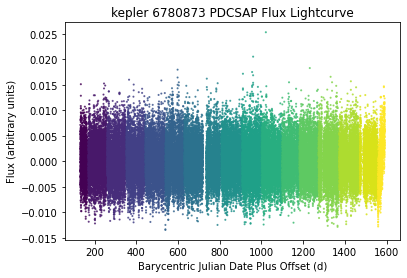

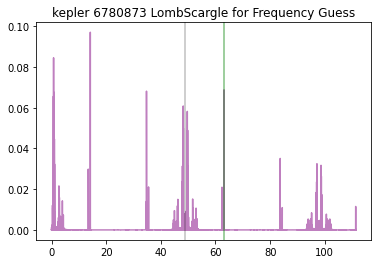

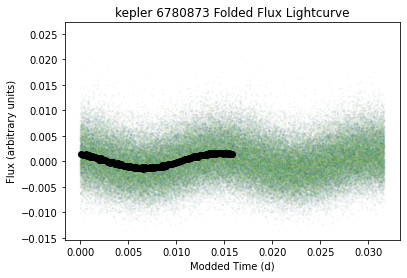

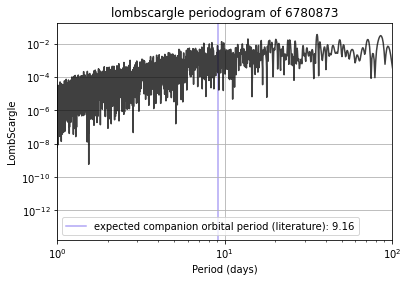

In [42]:
import StellarRadio_nostitch
%load_ext autoreload
%autoreload 2
stellar_init = StellarRadio_nostitch.StellarRadioAlg()
stellar_init.run_all_steps()